In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import random
import functools as ft


# Ensure that Pandas shows at least 280 characters in columns, so we can see full tweets
pd.set_option('max_colwidth', 280)
plt.style.use('fivethirtyeight')
sns.set()
sns.set_context("talk")



In [4]:
df_other_messages = pd.read_csv("mobile_test.txt", sep='\t', header=None, names=['other_messages'])

In [6]:
num_employees = 200
employee_ids = np.repeat(np.arange(1, num_employees + 1), repeats=119)

df_other_messages['employee_id'] = employee_ids[:len(df_other_messages)]

df_other_messages["other_messages"] = df_other_messages["other_messages"].str.lower().str.replace('[^\w\s]',' ', regex=True)
df_other_messages

,other_messages,employee_id
0,what s really going on here,1
1,i was hoping to put a small dab of glue and put it back,1
2,it s about the clacking sound when going off and on throttle at lower rpm,1
3,take out a plug one at a time and with an air gun put pressure on the cyl,1
4,don t you love how big the back seat is,1
...,...,...
23661,i was gunna do this on my girls car but seen how much work it was,199
23662,if your going to do it do it right,199
23663,it depends on how the rear sam looks to you and if it s even providing power anymore but in every case i ve come across a rear sam replacement has always been necessary,199
23664,i don t always get a chance to swap out my range loads for defensive loads,199


In [7]:
employee = pd.DataFrame()

In [9]:
df_other_messages["message_id"] = np.arange(1, len(df_other_messages)+1)

In [10]:
df_other_messages = df_other_messages.set_index('message_id')


In [11]:
df_other_messages

,other_messages,employee_id
message_id,,
1,what s really going on here,1
2,i was hoping to put a small dab of glue and put it back,1
3,it s about the clacking sound when going off and on throttle at lower rpm,1
4,take out a plug one at a time and with an air gun put pressure on the cyl,1
5,don t you love how big the back seat is,1
...,...,...
23662,i was gunna do this on my girls car but seen how much work it was,199
23663,if your going to do it do it right,199
23664,it depends on how the rear sam looks to you and if it s even providing power anymore but in every case i ve come across a rear sam replacement has always been necessary,199


In [12]:
employee_ids = df_other_messages['employee_id'].unique()
d = {}

# Iterate through employee IDs
for i in employee_ids:
    # Create a new dataframe containing messages for the current employee_id
    d[i] = df_other_messages[df_other_messages['employee_id'] == i][["other_messages"]].copy()

In [15]:
#d.items() #Checking items in dictionary

In [13]:
d[3]

,other_messages
message_id,
239,well it would certainly make sense that the request would be on other motorcycle forums
240,so the catholic institutions close and those employees have neither a job or health coverage
241,shop manual should have the draw spec i use ebc sintered on my ex
242,but again can t stress this enough
243,as much as i absolutely hated to
...,...
353,i ll take the hippo tang if it s still available
354,i actually get quite a bit of use out of my knives
355,its such a balanced club man


In [18]:
sent = pd.read_csv('vader_lexicon.txt', sep='\t', header=None, names=['token', 'polarity'], index_col='token', usecols=[0, 1])
sent.head()

,polarity
token,
$:,-1.5
%),-0.4
%-),-1.5
&-:,-0.4
&:,-0.7


In [19]:
def to_tidy_format(df):
    tidy = (
        df["other_messages"]
        .str.split()
        .explode()
        .to_frame()
        .rename(columns={"other_messages": "word"})
    )
    return tidy

In [20]:
tidy_d = {}
for i in employee_ids:
    # Create a new dataframe containing messages for the current employee_id
    tidy_d[i] = to_tidy_format(d[i])

In [21]:
tidy_d[1]

,word
message_id,
1,what
1,s
1,really
1,going
1,on
...,...
119,was
119,a
119,rich


In [22]:
#Adding polarity score

def add_polarity(df, tidy_df):
    df["polarity"] = (
        tidy_df
        .merge(sent, how='left', left_on='word', right_index=True)
        .reset_index()
        .loc[:, ['message_id', 'polarity']]
        .fillna(0)
        .groupby('message_id')
        .sum()
    )
    return df

In [23]:
for i in employee_ids:
    # Create a new dataframe containing messages for the current employee_id
    d[i] = add_polarity(d[i], tidy_d[i])

In [24]:
#d[i] is a dictionary with messages and polarity scores for each message, where i is employee_id
d[1]


,other_messages,polarity
message_id,,
1,what s really going on here,0.0
2,i was hoping to put a small dab of glue and put it back,1.8
3,it s about the clacking sound when going off and on throttle at lower rpm,-1.2
4,take out a plug one at a time and with an air gun put pressure on the cyl,-2.6
5,don t you love how big the back seat is,3.2
...,...,...
115,i am getting a little more roll off the rx and a little more check off the rxs,0.0
116,i hear you on the to do list,0.0
117,were you looking for contact or payg,0.0


## Employees' Messages

- employee id
- Message id
- Message Body
- Polarity for each message 

In [26]:
employee_messages = d.copy() #dictionary

In [27]:
employee_messages.keys()

dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199])

In [28]:
employee_messages[35]

,other_messages,polarity
message_id,,
4047,i dont know of anyone in sd tho,0.0
4048,too many assholes choosing to do as they please regardless of who it affects,-1.5
4049,if your gonna run meth you don t really need bigger injectors,0.0
4050,thank you,1.5
4051,the other notable one is the search feature,0.0
...,...,...
4161,one of the main advantages is both rider and passenger can listen to the audio system but if you don t ride with a passenger that would be a useless feature,-0.3
4162,the replacement i got today everything works,0.0
4163,originally i needed the smaller boat to fit in my garage now i have plently of land,1.5


In [29]:
#Find message with specific message id
message_id = 4047
employee_messages[35].loc[message_id][0]

/tmp/ipykernel_101/659687461.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  employee_messages[35].loc[message_id][0]


'i dont know of anyone in sd tho '

In [30]:
for emp_id, df in employee_messages.items():
    employee_messages[emp_id] = df.reset_index(drop=True)

In [31]:
#Uncomment this chunk of code to download Employee_messages csv files for every employee
"""import os
output_folder = "Employee_messages"

for employee_id, df in employee_messages.items():
    filename = os.path.join(output_folder, f"employee_{employee_id}_messages.csv")
    df.to_csv(filename, index=False)

    print(f"Saved DataFrame for employee ID {employee_id} to {filename}")"""

'import os\noutput_folder = "Employee_messages"\n\nfor employee_id, df in employee_messages.items():\n    filename = os.path.join(output_folder, f"employee_{employee_id}_messages.csv")\n    df.to_csv(filename, index=False)\n\n    print(f"Saved DataFrame for employee ID {employee_id} to {filename}")'

## Employees' Stats Dataframe
- Employee ID [DONE]
- Mean polarity of the messages [DONE]
- Team name [DONE]
- Z-score relative to team [DONE]
- Employee's Z-score relative to org [DONE]
- Time in the org [DONE]
- Email Adsress [Done]


In [32]:
teams = pd.read_csv("Team_names.csv")

In [33]:
mean_polarities = []

# Iterate through employee IDs
for i in employee_ids:
    # Calculate the mean polarity for the current employee
    mean_polarity = employee_messages[i]["polarity"].mean()
    mean_polarities.append((i, mean_polarity))

# Create a new dataframe from the list of mean polarities
employee_stats_df = pd.DataFrame(mean_polarities, columns=["employee_id", "mean_polarity"])

# Display the resulting dataframe
employee_stats_df["Team Name"] = teams["Team Name"]


In [54]:
employee_stats_df.head()

,employee_id,mean_polarity,Team Name,teams_mean_polarity,teams_std_polarity,Z-score relative to Team
0,1,0.584034,Team 8,0.660294,0.154588,-0.493313
1,2,0.655462,Team 1,0.647899,0.119206,0.063445
2,3,0.726050,Team 10,0.749832,0.176921,-0.134419
3,4,0.509244,Team 2,0.715042,0.143655,-1.432591
4,5,0.460504,Team 3,0.662027,0.147778,-1.363691


Text(0.5, 1.0, 'Distribution of Mean Polarities of All employees')

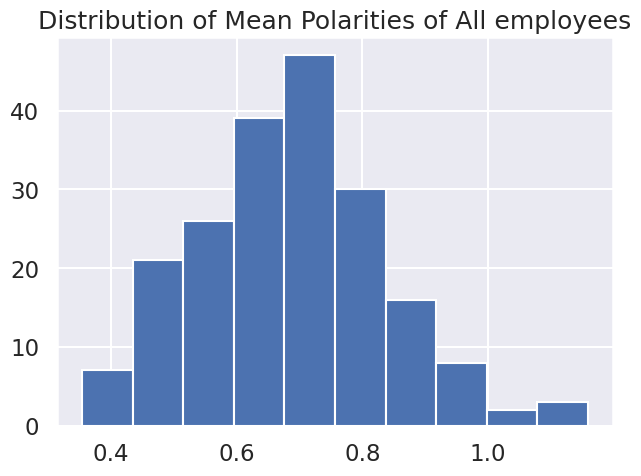

In [55]:
plt.hist(data = employee_stats_df, x = "mean_polarity")
plt.title("Distribution of Mean Polarities of All employees")

### Analyzing Team Data to add it to the Employeed data frame

In [36]:
team_means = employee_stats_df.groupby("Team Name").mean()
team_means

,employee_id,mean_polarity
Team Name,,
Team 1,98.850000,0.647899
Team 10,78.850000,0.749832
Team 2,101.250000,0.715042
Team 3,100.450000,0.662027
Team 4,99.100000,0.661429
Team 5,131.400000,0.709832
Team 6,95.421053,0.665369
Team 7,124.250000,0.704958
Team 8,83.400000,0.660294


In [37]:
t = team_means.drop(columns = "employee_id")

In [38]:
t = t.reset_index()
t

,Team Name,mean_polarity
0,Team 1,0.647899
1,Team 10,0.749832
2,Team 2,0.715042
3,Team 3,0.662027
4,Team 4,0.661429
5,Team 5,0.709832
6,Team 6,0.665369
7,Team 7,0.704958
8,Team 8,0.660294
9,Team 9,0.697353


In [39]:
team_mean_polarity_dict = dict(zip(t['Team Name'], t['mean_polarity']))

In [40]:
team_std = employee_stats_df.groupby("Team Name").std()
team_std = team_std.drop(columns = "employee_id").reset_index()
team_std = team_std.rename(columns = {"mean_polarity" : "teams polarity std"})

In [41]:
team_std_polarity_dict = dict(zip(team_std['Team Name'], team_std['teams polarity std']))

In [42]:
team_std_polarity_dict

{'Team 1': 0.11920619733690827,
 'Team 10': 0.17692053167842986,
 'Team 2': 0.14365464106930342,
 'Team 3': 0.1477776529566971,
 'Team 4': 0.18650757861022382,
 'Team 5': 0.137799780161994,
 'Team 6': 0.13513673970574464,
 'Team 7': 0.1442574912436593,
 'Team 8': 0.15458840354205108,
 'Team 9': 0.14952075198984485}

In [43]:
employee_stats_df['teams_mean_polarity'] = employee_stats_df["Team Name"].map(team_mean_polarity_dict)
employee_stats_df['teams_std_polarity'] = employee_stats_df["Team Name"].map(team_std_polarity_dict)


In [44]:
employee_stats_df["Z-score relative to Team"] = (employee_stats_df["mean_polarity"] - employee_stats_df["teams_mean_polarity"])/ employee_stats_df["teams_std_polarity"]

Text(0.5, 1.0, "Distribution of Z-scores relative to Team's Mean Polarity")

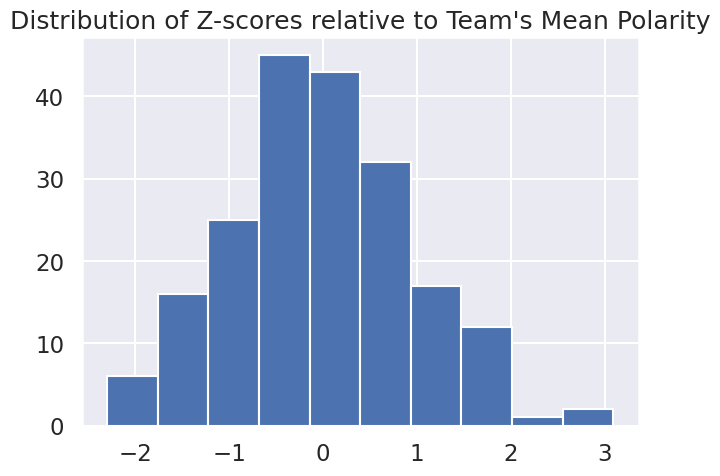

In [52]:
plt.hist(data = employee_stats_df, x = "Z-score relative to Team")
plt.title("Distribution of Z-scores relative to Team's Mean Polarity")

In [56]:
employee_stats_df["ORG: mean of all employees mean polarity"] = employee_stats_df["mean_polarity"].mean()
employee_stats_df["ORG: std of all employees mean polarity"] = employee_stats_df["mean_polarity"].std()

In [57]:
employee_stats_df["Z-score relative to ORG"] = (employee_stats_df["mean_polarity"] - employee_stats_df["ORG: mean of all employees mean polarity"])/ employee_stats_df["ORG: std of all employees mean polarity"]

In [58]:
employee_stats_df

,employee_id,mean_polarity,Team Name,teams_mean_polarity,teams_std_polarity,Z-score relative to Team,ORG: mean of all employees mean polarity,ORG: std of all employees mean polarity,Z-score relative to ORG
0,1,0.584034,Team 8,0.660294,0.154588,-0.493313,0.687514,0.150576,-0.687230
1,2,0.655462,Team 1,0.647899,0.119206,0.063445,0.687514,0.150576,-0.212862
2,3,0.726050,Team 10,0.749832,0.176921,-0.134419,0.687514,0.150576,0.255924
3,4,0.509244,Team 2,0.715042,0.143655,-1.432591,0.687514,0.150576,-1.183921
4,5,0.460504,Team 3,0.662027,0.147778,-1.363691,0.687514,0.150576,-1.507607
...,...,...,...,...,...,...,...,...,...
194,195,0.594118,Team 5,0.709832,0.137800,-0.839728,0.687514,0.150576,-0.620261
195,196,0.563866,Team 2,0.715042,0.143655,-1.052361,0.687514,0.150576,-0.821169
196,197,0.457983,Team 5,0.709832,0.137800,-1.827643,0.687514,0.150576,-1.524350
197,198,0.798319,Team 7,0.704958,0.144257,0.647185,0.687514,0.150576,0.735873


In [59]:
emails = pd.read_csv("email_adresses.csv", header = None)

In [60]:
emails = emails.rename(columns = {0 : "email_adresses"})

In [61]:
#Adding Toy emails
emails = emails.iloc[0:199,]
emails

,email_adresses
0,Abdul_Hall5617@zynuu.site
1,Chester_Thompson9590@hepmv.solutions
2,Samantha_Bright8939@nanoff.app
3,Tony_Avery6488@yafr7.space
4,Daron_Skinner8804@ptr6k.info
...,...
194,Daron_Newman7013@y96lx.shop
195,Johnathan_Bright5113@bu2lo.press
196,Benjamin_Walker538@ckzyi.info
197,Christine_Everett1932@kyb7t.zone


In [62]:
employee_stats_df["email"] = emails["email_adresses"]

In [63]:
#Toy years data
years_worked = [17, 19,  2, 10, 15, 10, 13, 12,  6,  4, 15, 19,  9,  1, 19,  0,  3,
        4,  5,  1, 10,  0, 16, 11, 12, 14, 16,  0,  5, 11,  3,  7, 16,  0,
        6,  0, 19,  2, 14, 10,  8,  8,  3, 16,  2,  5,  1,  9,  3,  9, 11,
        2,  8,  1, 19,  7,  7, 12,  3, 17, 13,  3, 12, 14,  2,  3, 14,  0,
        1, 11,  6, 14, 17,  8, 14, 16,  6,  5, 15,  6, 16,  5,  2,  9,  5,
        2, 16,  5, 17,  4, 18,  9, 15, 12, 19,  0, 14,  6, 10, 15,  8, 12,
       16,  3, 18,  7,  4,  5,  4, 14, 11, 12,  9,  1, 14, 16, 14, 14, 10,
        1, 11,  6,  4, 19,  8,  9,  3, 16,  3,  1, 13, 16,  4,  1,  1, 12,
        8,  5,  5, 12,  2, 14,  7, 18, 18, 16,  8,  5,  3,  1, 16, 12,  4,
        9,  2,  7,  5,  8, 12,  4,  5, 15, 12,  4,  1,  2,  3, 18,  9, 11,
       10, 18, 12, 18, 16,  0, 16, 10,  1, 10, 17,  3, 10,  5, 16, 12, 12,
       11,  1,  5,  2,  7, 19, 19, 12, 12,  7,  2, 13]

In [64]:
employee_stats_df["years_worked"] = years_worked

In [65]:
employee_stats_df

,employee_id,mean_polarity,Team Name,teams_mean_polarity,teams_std_polarity,Z-score relative to Team,ORG: mean of all employees mean polarity,ORG: std of all employees mean polarity,Z-score relative to ORG,email,years_worked
0,1,0.584034,Team 8,0.660294,0.154588,-0.493313,0.687514,0.150576,-0.687230,Abdul_Hall5617@zynuu.site,17
1,2,0.655462,Team 1,0.647899,0.119206,0.063445,0.687514,0.150576,-0.212862,Chester_Thompson9590@hepmv.solutions,19
2,3,0.726050,Team 10,0.749832,0.176921,-0.134419,0.687514,0.150576,0.255924,Samantha_Bright8939@nanoff.app,2
3,4,0.509244,Team 2,0.715042,0.143655,-1.432591,0.687514,0.150576,-1.183921,Tony_Avery6488@yafr7.space,10
4,5,0.460504,Team 3,0.662027,0.147778,-1.363691,0.687514,0.150576,-1.507607,Daron_Skinner8804@ptr6k.info,15
...,...,...,...,...,...,...,...,...,...,...,...
194,195,0.594118,Team 5,0.709832,0.137800,-0.839728,0.687514,0.150576,-0.620261,Daron_Newman7013@y96lx.shop,12
195,196,0.563866,Team 2,0.715042,0.143655,-1.052361,0.687514,0.150576,-0.821169,Johnathan_Bright5113@bu2lo.press,12
196,197,0.457983,Team 5,0.709832,0.137800,-1.827643,0.687514,0.150576,-1.524350,Benjamin_Walker538@ckzyi.info,7
197,198,0.798319,Team 7,0.704958,0.144257,0.647185,0.687514,0.150576,0.735873,Christine_Everett1932@kyb7t.zone,2


In [66]:
#Uncomment to export this dataframe 
#employee_stats_df.to_csv("employee_stats_df.csv")

## Teams Dataframe:
- Team Name
- Number of employees
- Teams Z-score relative to org

In [68]:
team_df = t.copy()
team_df["team_std"] = team_std['teams polarity std']

In [69]:
team_df["ORG: mean of all employees mean polarity"] = employee_stats_df["ORG: mean of all employees mean polarity"].iloc[0:10,]
team_df["ORG: std of all employees mean polarity"] = employee_stats_df["ORG: std of all employees mean polarity"].iloc[0:10,]


In [70]:
team_df["Z-score relative to the ORG"] = (team_df["mean_polarity"] - team_df["ORG: mean of all employees mean polarity"])/team_df["ORG: std of all employees mean polarity"]

In [71]:
team_df

,Team Name,mean_polarity,team_std,ORG: mean of all employees mean polarity,ORG: std of all employees mean polarity,Z-score relative to the ORG
0,Team 1,0.647899,0.119206,0.687514,0.150576,-0.263090
1,Team 10,0.749832,0.176921,0.687514,0.150576,0.413861
2,Team 2,0.715042,0.143655,0.687514,0.150576,0.182816
3,Team 3,0.662027,0.147778,0.687514,0.150576,-0.169263
4,Team 4,0.661429,0.186508,0.687514,0.150576,-0.173239
5,Team 5,0.709832,0.137800,0.687514,0.150576,0.148215
6,Team 6,0.665369,0.135137,0.687514,0.150576,-0.147068
7,Team 7,0.704958,0.144257,0.687514,0.150576,0.115846
8,Team 8,0.660294,0.154588,0.687514,0.150576,-0.180773
9,Team 9,0.697353,0.149521,0.687514,0.150576,0.065340


In [ ]:
#Uncomment to export this dataframe 
#team_df.to_csv("team_df.csv")

## Organization Stats
- "best team"
- "worst team"
- "median teams"

In [73]:
best_team_idx = team_df["Z-score relative to the ORG"].idxmax()

In [74]:
best_team = team_df.iloc[[best_team_idx ]]

In [75]:
best_team

,Team Name,mean_polarity,team_std,ORG: mean of all employees mean polarity,ORG: std of all employees mean polarity,Z-score relative to the ORG
1,Team 10,0.749832,0.176921,0.687514,0.150576,0.413861


In [77]:
worst_team_idx = team_df["Z-score relative to the ORG"].idxmin()

In [78]:
worst_team = team_df.iloc[[worst_team_idx]]

In [79]:
worst_team

,Team Name,mean_polarity,team_std,ORG: mean of all employees mean polarity,ORG: std of all employees mean polarity,Z-score relative to the ORG
0,Team 1,0.647899,0.119206,0.687514,0.150576,-0.26309


In [80]:
sorted_df = team_df.sort_values(by='Z-score relative to the ORG')
median_teams = sorted_df.iloc[4:6]
#median_teams = sorted_df.iloc[median_rows]

In [90]:
median_teams.loc[:, "All team's Median"] = median_teams["Z-score relative to the ORG"].median()

In [91]:
#median_row["All team's Median"] = median_rows["Z-score relative to the ORG"].median()

In [92]:
median_teams = median_teams.reset_index(drop=True)

In [93]:
median_teams

,Team Name,mean_polarity,team_std,ORG: mean of all employees mean polarity,ORG: std of all employees mean polarity,Z-score relative to the ORG,All team's Median
0,Team 6,0.665369,0.135137,0.687514,0.150576,-0.147068,-0.040864
1,Team 9,0.697353,0.149521,0.687514,0.150576,0.065340,-0.040864
